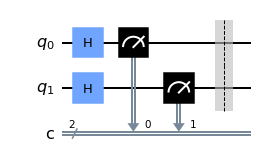

In [1]:
# Quantum Random Number Generator

# Packages
from qiskit import Aer, QuantumCircuit, execute
import numpy as np

# Basic Circuit for a two-qubit system
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.h(1)
circuit.measure([0,1],[0,1])
circuit.barrier()
display(circuit.draw('mpl'))

In [2]:
def map(value, leftMin, leftMax, rightMin, rightMax):
    # Maps one range to another
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

In [3]:
# The Generator

def RNG(a, b, qubits):

    circuit = QuantumCircuit(qubits, qubits)

    for i in range (qubits):
        circuit.h(i)
        circuit.measure(i,i)

    simulator = Aer.get_backend('statevector_simulator')
    job = execute(circuit, simulator, shots=1)
    result = job.result()
    state = result.get_statevector(circuit)

    n=0

    for i in range(state.size):
        if abs(state[i]) != 0:
            n = i

    random = map(n, -qubits, len(state)-1+qubits, a, b)

    return random

In [7]:
y=[]
for i in range (50):
    y.append(RNG(1,100,3))

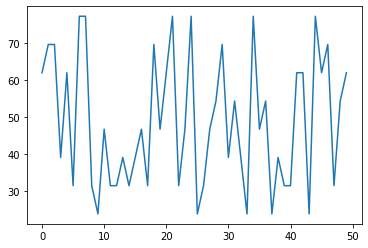

In [8]:
import matplotlib.pyplot as plt
plt.plot(y)

In [9]:
# Number of unique random numbers:

count = 0

z=[]

#Counting the number of unique elements

for num in y:
    if num not in z:
        count = count+1
        z.append(num)
print('The number of unique elements in provided random distribution is:')
print(count)

The number of unique elements in provided random distribution is:
8
